In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика

In [46]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [47]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [48]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [49]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [50]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


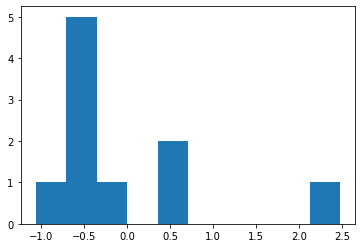

In [8]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [55]:
X_norm = X.copy().astype(np.float64)

In [56]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [58]:
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [59]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [40]:
X_norm_st = standard_scale(X_norm)

In [66]:
X_norm_st = X.copy().astype(np.float64)
X_norm_st[:, 1] = standard_scale(X_norm_st[:, 1])
X_norm_st[:, 2] = standard_scale(X_norm_st[:, 2])
X_norm_st[:, 3] = standard_scale(X_norm_st[:, 3])

X_norm_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [67]:
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([ 1.        , -1.06066017, -1.08270439, -0.89625816]),
 array([1.        , 2.47487373, 2.11385144, 1.66447944]))

In [68]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([1.00000000e+00, 2.22044605e-17, 2.49800181e-17, 8.32667268e-17]),
 array([0., 1., 1., 1.]))

Та операция, которая идёт последняя (в данном случае стандартизация) будет перетягивать всё внимание на себя. После неё получились значения, которые и должны быть после её выполнения (среднее значение равно 0, стандартное отклонение равно 1). Т.е. к одному и тому же признаку можно применить и нормализацию, и стандартизацию, но смысла в этом нет. 

3. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [17]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y)
        dReg = reg * np.sign(W)
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [18]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [ 1.30615359 -0.48728457 -0.28651624  0.01411824], error 3365.6262142030246
Iter: 500, weights: [56.49273593  5.91138814  1.10924516  5.43998843], error 25.27430720918881
Iter: 1000, weights: [56.49499991  6.18857472  0.1617531   6.14493844], error 24.95218797940998
Iter: 1500, weights: [56.495       6.25127328 -0.1405546   6.3983175 ], error 24.912774383764404
Iter: 2000, weights: [56.495       6.27123656 -0.24051145  6.48152791], error 24.906968344797274
Iter: 2500, weights: [56.495       6.27866713 -0.27656701  6.5113241 ], error 24.905745552200578
Iter: 3000, weights: [56.495       6.28135423 -0.28954885  6.52204107], error 24.90541786815461
Iter: 3500, weights: [56.495       6.28232207 -0.29422175  6.52589815], error 24.90531449652396
Iter: 4000, weights: [56.495       6.28267047 -0.29590373  6.52728645], error 24.905279177491487
Iter: 4500, weights: [56.495       6.28279588 -0.29650915  6.52778616], error 24.90526670941926
Final MSE: 24.905262253347644


array([56.495     ,  6.28284097, -0.29672681,  6.52796582])